# Project: Data Visualizations in Python for YouTube Dataset

In [2]:
# Import Pandas and NumPy
import pandas as pd
import numpy as np

# Read the .csv file
youtube = pd.read_csv("youtube_dataset.csv")
youtube.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country,Nationality
0,MrBeast,No,340.0,English,Entertainment,United States,American
1,T-Series,Yes,282.0,Hindi,Music,India,Indian
2,Cocomelon - Nursery Rhymes,Yes,187.0,English,Education,United States,American
3,SET India,Yes,180.0,Hindi,Entertainment,India,Indian
4,Vlad and Niki,No,131.0,English,Entertainment,United States,American


In [3]:
# Check for data type before doing anything
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50 non-null     object 
 1   Brand channel           50 non-null     object 
 2   Subscribers (millions)  50 non-null     float64
 3   Primary language        50 non-null     object 
 4   Category                50 non-null     object 
 5   Country                 50 non-null     object 
 6   Nationality             50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB


The data types for each column are correct

In [5]:
# Check for basic numerical statistic
youtube.describe()

,Subscribers (millions)
count,50.000000
mean,91.936000
std,53.593446
min,57.600000
25%,63.650000
50%,72.500000
75%,97.525000
max,340.000000


Subscribers (millions) column is the only numerical column out of 6 columns.

---

## Data visualizations

In [9]:
# Import seaborn and matplotlib packages
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn graphing looks as default for every chart
sns.set_theme()

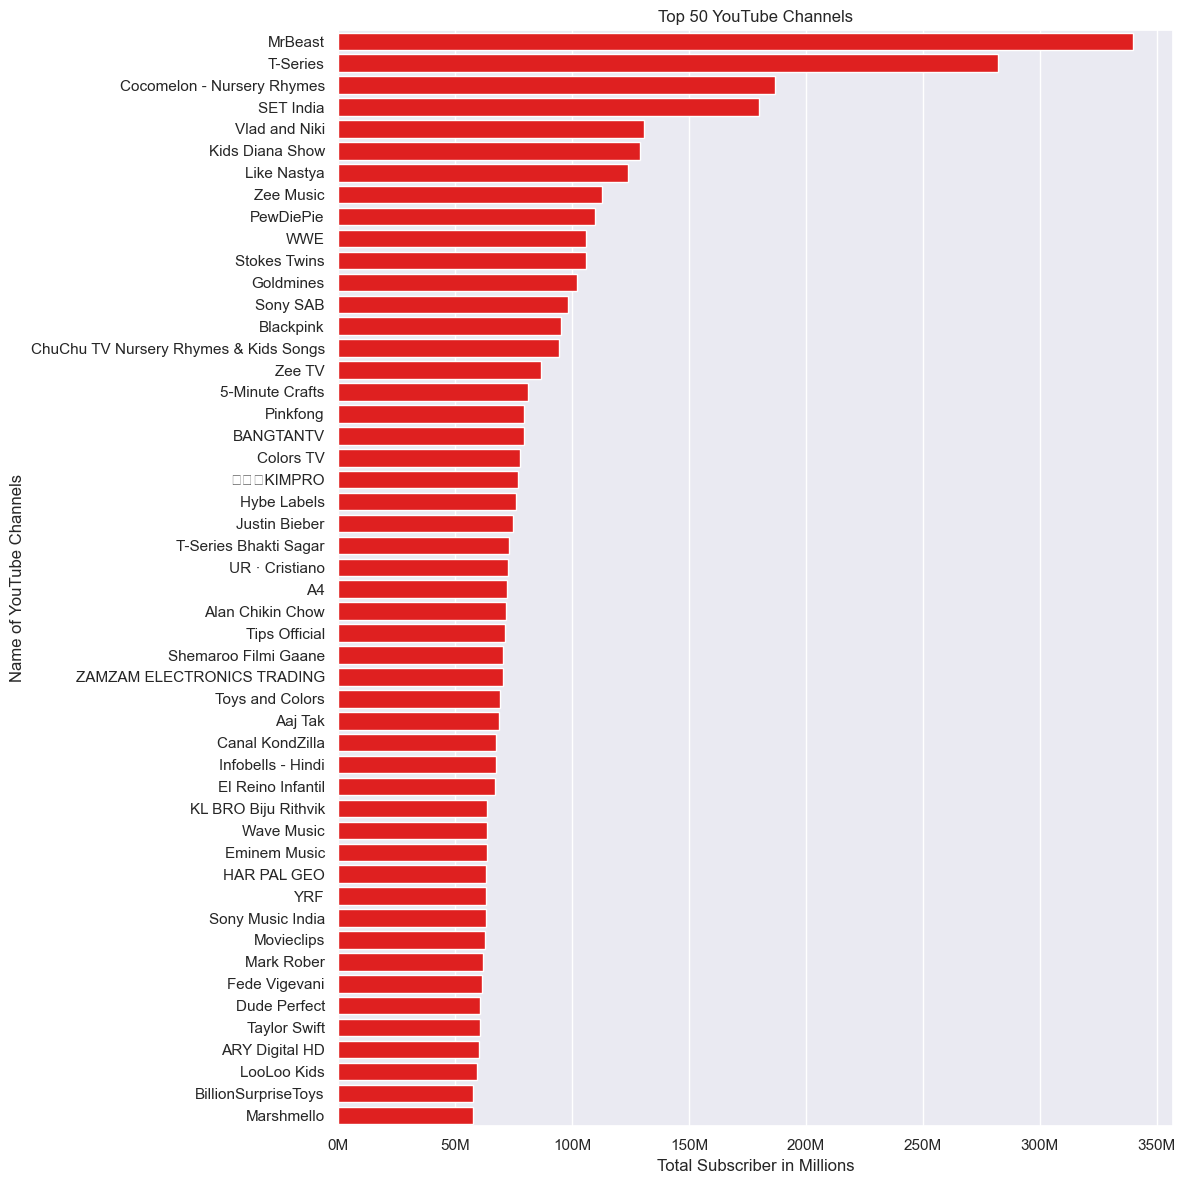

In [10]:
# Import warnings package to supress ignore on "UserWarning: Glyph (#####)" due to Korean font
import warnings
warnings.filterwarnings("ignore")

# Look at a general horizontal bar chart of x and y, number of subscribers in millions and names of youtube channels
plt.figure(figsize=(12, 12))
sns.barplot(data=youtube, x="Subscribers (millions)", y="Name", color="#FF0000")

# Create labels, title, and ticks
plt.title("Top 50 YouTube Channels")
plt.xlabel("Total Subscriber in Millions")
plt.ylabel("Name of YouTube Channels")
plt.xticks(ticks=[0, 50, 100, 150, 200, 250, 300, 350], labels=["0M", "50M", "100M", "150M", "200M", "250M", "300M", "350M"])
           
# Display a plot
plt.tight_layout()
plt.show()

---

In [12]:
# Create a .groupby function to create top countries
youtube_top_countries = youtube.groupby("Country")["Subscribers (millions)"].sum()
# Sort values
youtube_top_countries = youtube_top_countries.sort_values(ascending=False)
# Check to see if sorting values work
youtube_top_countries

Country
India                   1639.4
United States           1560.0
South Korea              407.9
United Arab Emirates     199.5
Pakistan                 123.6
Japan                    110.0
Cyprus                    81.1
Canada                    74.6
Portugal                  72.6
Belarus                   72.4
Brazil                    67.5
Argentina                 67.3
Mexico                    61.4
Romania                   59.5
Name: Subscribers (millions), dtype: float64

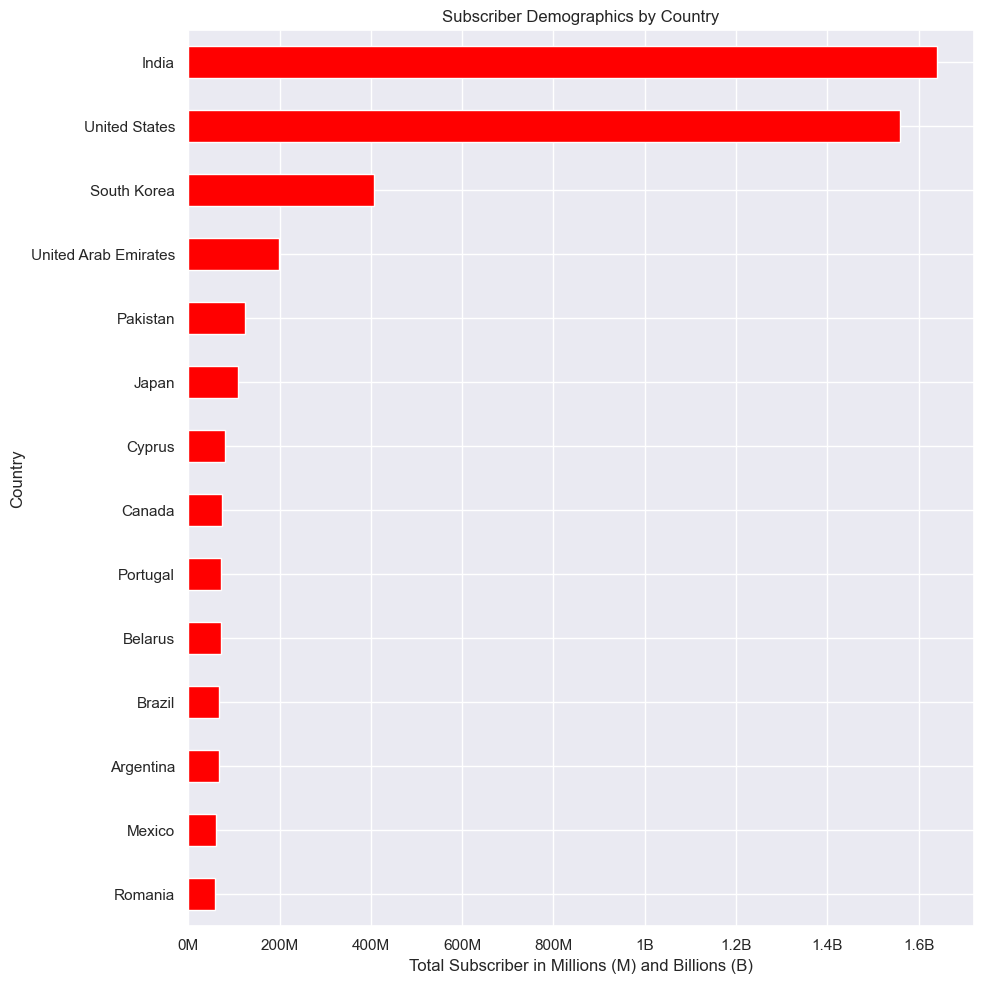

In [13]:
# Initialize a horizontal bar plot
plt.figure(figsize=(10, 10))
youtube_top_countries.plot(kind="barh", color="#FF0000")
plt.gca().invert_yaxis()

# Create title, labels, and ticks
plt.title("Subscriber Demographics by Country")
plt.xlabel("Total Subscriber in Millions (M) and Billions (B)")
plt.ylabel("Country")
plt.xticks(ticks=[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600],
           labels=["0M", "200M", "400M", "600M", "800M", "1B", "1.2B", "1.4B", "1.6B"])

# Display a plot
plt.tight_layout()
plt.show()

---

In [15]:
# Create a variable for .groupby function based on category column with total of subscribers
youtube_top_categories = youtube.groupby("Category")["Subscribers (millions)"].sum()
# Sort values
youtube_top_categories = youtube_top_categories.sort_values(ascending=False)

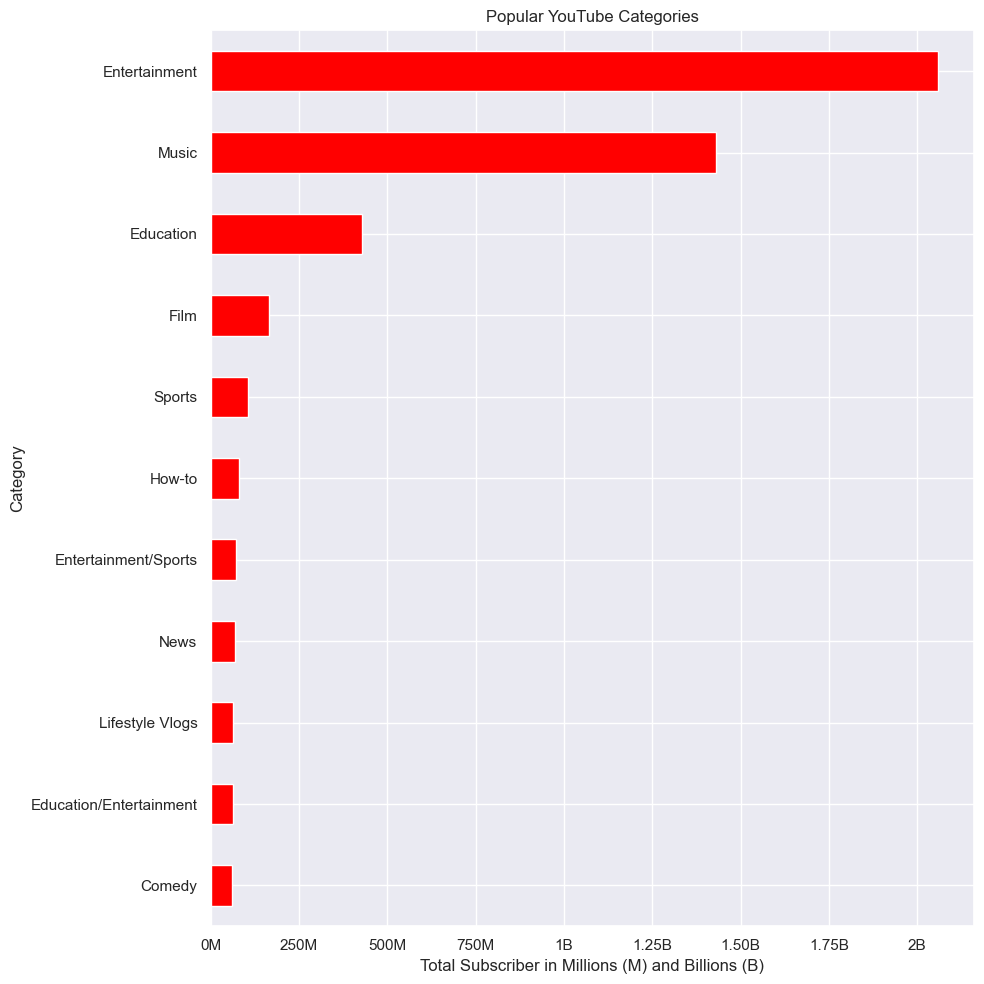

In [16]:
# Create a bar plot in horizontal way
plt.figure(figsize=(10,10))
youtube_top_categories.plot(kind="barh", color="#FF0000")
plt.gca().invert_yaxis()

# Create title, labels, and ticks
plt.title("Popular YouTube Categories")
plt.xlabel("Total Subscriber in Millions (M) and Billions (B)")
plt.ylabel("Category")
plt.xticks(ticks=[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000],
           labels=["0M", "250M", "500M", "750M", "1B", "1.25B", "1.50B", "1.75B", "2B"])

# Display the plot
plt.tight_layout()
plt.show()

---

In [18]:
# Create a .groupby function for youtubers' nationality
youtube_top_nationality = youtube.groupby("Nationality")["Subscribers (millions)"].sum()

# Sort values
youtube_top_nationality = youtube_top_nationality.sort_values(ascending=False)

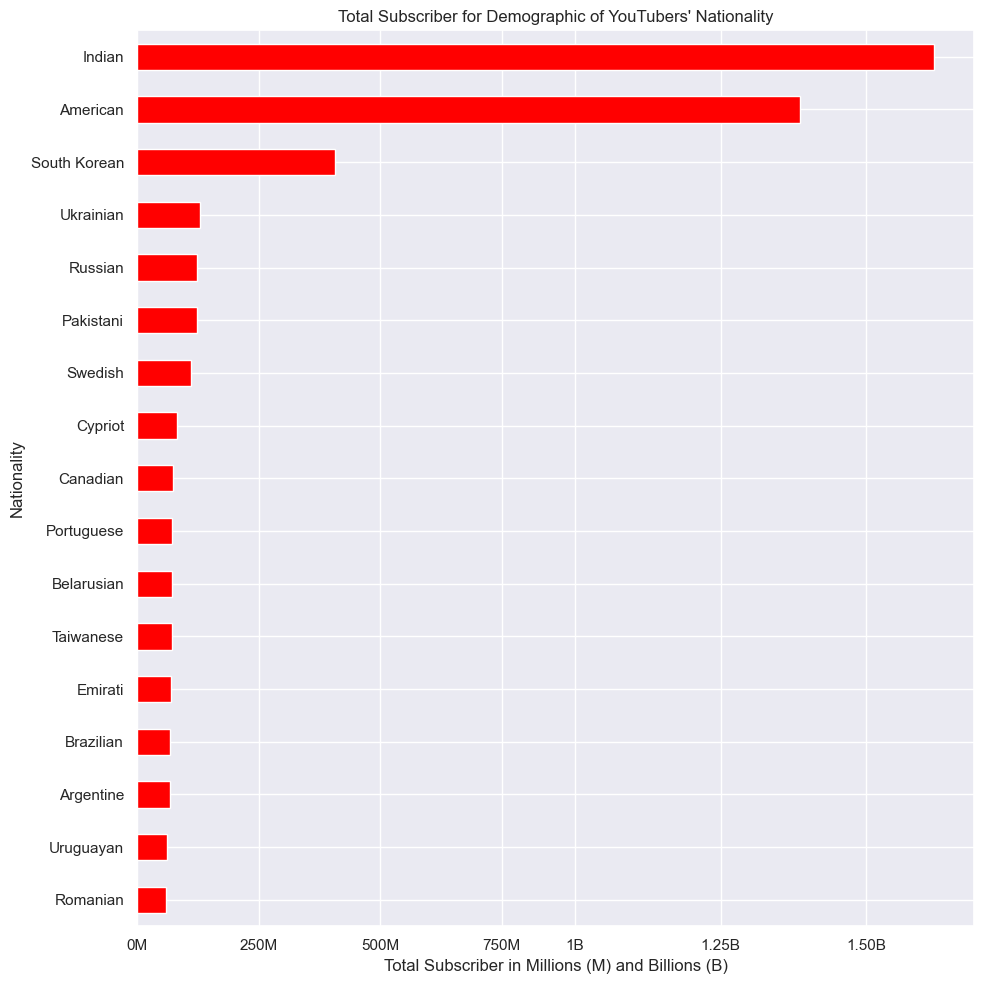

In [19]:
# Start creating a chart
plt.figure(figsize=(10,10))
youtube_top_nationality.plot(kind="barh", color="#FF0000")
plt.gca().invert_yaxis()

# Create title, labels, and ticks
plt.title("Total Subscriber for Demographic of YouTubers' Nationality")
plt.xlabel("Total Subscriber in Millions (M) and Billions (B)")
plt.ylabel("Nationality")
plt.xticks(ticks=[0, 250, 500, 750, 900, 1200, 1500],
           labels=["0M", "250M", "500M", "750M", "1B", "1.25B", "1.50B"])

# Show a graph
plt.tight_layout()
plt.show()

---

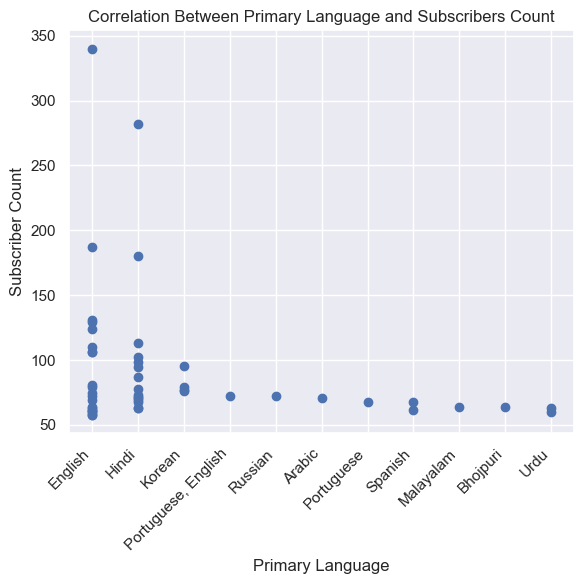

In [21]:
# Start create scatter to see the correlation between x and y
plt.figure(figsize=(6, 6))
plt.scatter(x=youtube["Primary language"], y=youtube["Subscribers (millions)"])

# Create title, labels, and ticks rotation
plt.title("Correlation Between Primary Language and Subscribers Count")
plt.xlabel("Primary Language")
plt.ylabel("Subscriber Count")
plt.xticks(rotation=45, ha="right")

# Display a plot
plt.tight_layout()
plt.show()

---

In [23]:
youtube.loc[youtube["Brand channel"] == "Yes"]["Brand channel"].count()

29

In [24]:
youtube.loc[youtube["Brand channel"] == "No"]["Brand channel"].count()

21

In [25]:
# Create a variable that focus on Yes and No for Brand channel
youtube_brand = youtube.groupby("Brand channel")["Subscribers (millions)"].sum()

# Sort by values
youtube_brand = youtube_brand.sort_values(ascending=False)
youtube_brand

Brand channel
Yes    2673.0
No     1923.8
Name: Subscribers (millions), dtype: float64

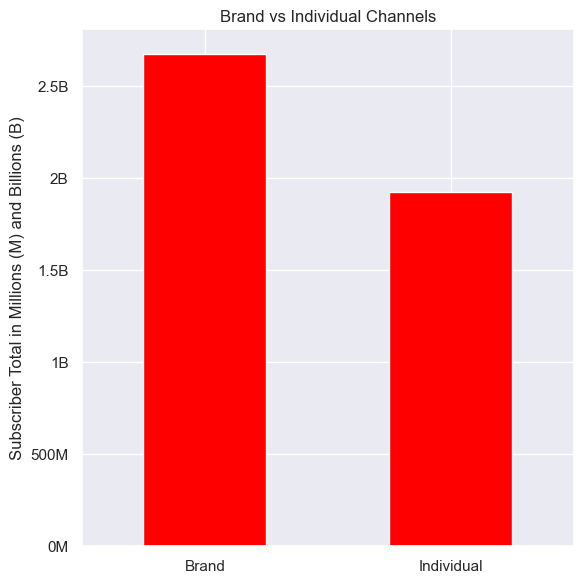

In [58]:
# Create a plot
plt.figure(figsize=(6, 6))
youtube_brand.plot(kind="bar", color="#FF0000")

# Create title and labels
plt.title("Brand vs Individual Channels")
plt.xticks(ticks=[0, 1], labels=["Brand", "Individual"], rotation=0)
plt.yticks(ticks=[0, 500, 1000, 1500, 2000, 2500], labels=["0M", "500M", "1B", "1.5B", "2B", "2.5B"])
plt.xlabel("")
plt.ylabel("Subscriber Total in Millions (M) and Billions (B)")

# Display the plot
plt.tight_layout()
plt.show()